# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [1]:
import pandas as pd
 
data_Bryant = pd.read_csv('./data/Bryantetal2010.csv', index_col=False)
x_Bryant = data_Bryant.iloc[:, 2:11]
y_Bryant = data_Bryant.iloc[:, 15].values


C:\Users\na0e2\Miniconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\na0e2\Miniconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


                          reproduce coverage  reproduce density
Total biomass                          100.0              100.0
Demand elasticity                      100.0              100.0
Biomass backstop price                 100.0              100.0
Cellulosic cost                         90.0               90.0
Cellulosic yield                        30.0               30.0
Electricity coproduction                30.0               20.0
oil supply shift                        10.0               10.0
Feedstock distribution                   0.0                0.0
Oil elasticity                           0.0                0.0
coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.79998

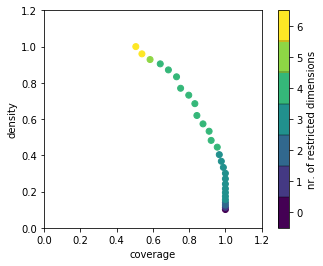

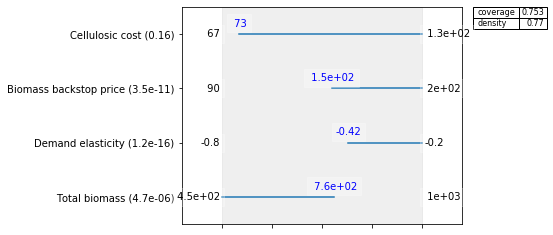

In [2]:
import matplotlib.pyplot as plt

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)


prim_alg = prim.Prim(x_Bryant, y_Bryant, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(21))
box1.inspect(21)
box1.inspect(21, style='graph')

plt.show()

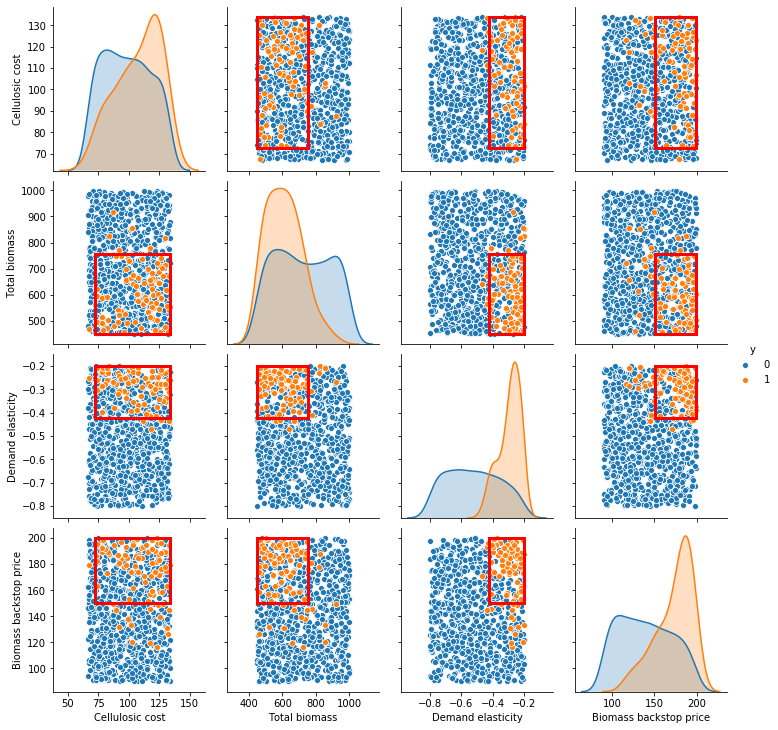

In [3]:
box1.show_pairs_scatter(21)
plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [5]:
import pandas as pd
 
data_Rozenberg = pd.read_csv('./data/Rozenberg et al 2014.csv', index_col=False)
x_Rozenberg = data_Rozenberg.iloc[:, 0:7]
y_Rozenberg = data_Rozenberg.iloc[:, 7].values

In [10]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.153846,0,1.000000,0.153846,0
1,1.000000,0.309859,1,0.496503,0.309859,1
2,0.931818,0.436170,2,0.328671,0.436170,2
3,0.704545,0.659574,3,0.164336,0.659574,3
4,0.545455,0.774194,4,0.108392,0.774194,4
5,0.340909,0.937500,5,0.055944,0.937500,4


[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


                 reproduce coverage  reproduce density
convergence                   100.0              100.0
population                    100.0              100.0
behaviors                     100.0              100.0
inequalities                   90.0               90.0
technologies                   10.0               10.0
fossils                        10.0               10.0
capital markets                10.0               10.0
coverage     0.340909
density        0.9375
id                  5
mass        0.0559441
mean           0.9375
res_dim             4
Name: 5, dtype: object

             box 5                                    
               min  max                      qp values
population     0.0  0.0   [-1.0, 0.011071443574430165]
behaviors      1.0  1.0  [0.0009414028575075368, -1.0]
inequalities   1.0  1.0    [0.08236570519412031, -1.0]
convergence    1.0  2.0    [0.32186915036588915, -1.0]



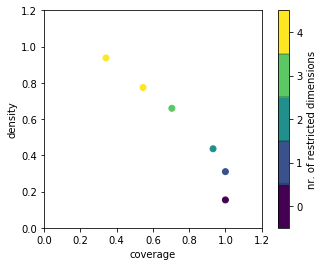

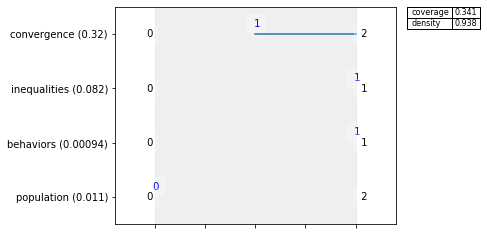

In [33]:
prim_alg = prim.Prim(x_Rozenberg, y_Rozenberg, threshold=0.1, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(5))
box1.inspect(5)
box1.inspect(5, style='graph')

plt.show()

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from ema_workbench import ema_logging, load_results
import ema_workbench.analysis.prim as prim

fn = r'./data/Hamarat et al 2013.gz'
x, outcomes = load_results(fn)

# specify y
y = outcomes['fraction renewables'][:, -1] < outcomes['fraction renewables'][:, 0]



In [8]:
x_new = x.iloc[:,:-2]
x_new.columns

Index(['SWITCH Market price determination', 'SWITCH TGC obligation curve',
       'SWITCH carbon cap', 'SWITCH carbon price determination',
       'SWITCH economic growth', 'SWITCH electrification rate',
       'SWITCH interconnection capacity expansion', 'SWITCH lookup curve TGC',
       'SWITCH low reserve margin price markup', 'SWITCH physical limits',
       'SWITCH storage for intermittent supply',
       'SWTICH preference carbon curve', 'demand fuel price elasticity factor',
       'economic lifetime biomass', 'economic lifetime coal',
       'economic lifetime gas', 'economic lifetime hydro',
       'economic lifetime igcc', 'economic lifetime ngcc',
       'economic lifetime nuclear', 'economic lifetime pv',
       'economic lifetime wind', 'investment proportionality constant',
       'investors desired excess capacity investment',
       'maximum battery storage uncertainty constant',
       'maximum no storage penetration rate pv',
       'maximum no storage penetration rat

In [18]:

#rotated_experiments, rotation_matrix = prim.pca_preprocess(x_new, y)
prim_obj = prim.Prim(x_new, y, threshold=0.1)
box = prim_obj.find_box()

#box.show_tradeoff()
#box.inspect(0)
#plt.show()

In [19]:
box.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.174200,0,1.0000,0.174200,0
1,0.943743,0.197264,1,0.8334,0.197264,1
2,0.929966,0.204649,2,0.7916,0.204649,2
3,0.920781,0.213298,3,0.7520,0.213298,2
4,0.907003,0.221165,4,0.7144,0.221165,2
5,0.890930,0.228706,5,0.6786,0.228706,2
6,0.877153,0.237046,6,0.6446,0.237046,2
7,0.811711,0.263708,7,0.5362,0.263708,3
8,0.795637,0.272192,8,0.5092,0.272192,4
9,0.712974,0.304711,9,0.4076,0.304711,4


coverage    0.220436
density     0.732824
id                40
mass          0.0524
mean        0.732824
res_dim           12
Name: 40, dtype: object

                                               box 40                \
                                                  min           max   
economic lifetime wind                        20.0009       27.1381   
economic lifetime pv                          20.0002       28.8083   
progress ratio ngcc                          0.850016      0.992688   
SWITCH economic growth                      {1, 2, 5}     {1, 2, 5}   
progress ratio wind                          0.918217      0.999986   
SWITCH electrification rate              {1, 2, 4, 5}  {1, 2, 4, 5}   
time of nuclear power plant ban               2035.98       2096.56   
weight factor marginal investment costs       1.96483       9.99922   
economic lifetime nuclear                     52.3818       69.9969   
progress ratio pv                             0.75727      0.899972 

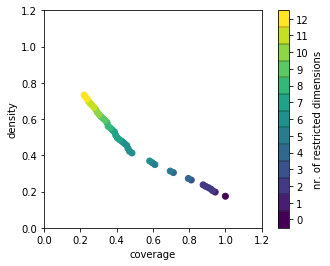

In [20]:
box.show_tradeoff()
box.inspect(40)
plt.show()

In [24]:
#delete categorical columns
x_numeric = x_new.select_dtypes(exclude=pd.CategoricalDtype)
x_numeric

,demand fuel price elasticity factor,economic lifetime biomass,economic lifetime coal,economic lifetime gas,economic lifetime hydro,economic lifetime igcc,economic lifetime ngcc,economic lifetime nuclear,economic lifetime pv,economic lifetime wind,...,progress ratio pv,progress ratio wind,starting construction time,time of nuclear power plant ban,uncertainty initial gross fuel costs,weight factor carbon abatement,weight factor marginal investment costs,weight factor technological familiarity,weight factor technological growth potential,year
0,0.077496,37.543963,36.876307,33.711768,51.592439,32.158807,37.744264,54.640947,26.334196,28.858116,...,0.847988,0.976581,0.813530,2045.490971,0.906060,8.761673,8.859864,4.240532,5.476591,0.939007
1,0.255003,48.957393,35.530551,26.475980,57.999097,46.150758,26.314175,63.457026,25.888506,28.116622,...,0.815255,0.852252,1.712138,2088.839530,0.741120,4.573769,4.300891,4.159390,9.782508,0.964794
2,0.039817,32.209231,37.456813,28.471929,56.468963,38.360928,37.112850,56.335537,24.085622,22.395718,...,0.761776,0.953124,0.390609,2013.876882,1.396959,9.374337,1.586548,2.431839,1.282010,1.070390
3,0.422542,30.254900,47.876728,38.764934,57.692945,33.050055,27.912008,63.611705,23.604295,25.174630,...,0.840963,0.941029,2.069449,2042.566070,1.034850,3.912941,8.038037,1.170614,4.865733,0.979062
4,0.346835,37.171874,47.391927,25.172522,63.647553,37.471323,27.936268,59.440919,23.076289,24.041438,...,0.805999,0.859009,1.094902,2051.277387,0.590479,3.663262,8.602380,7.392188,2.125345,1.073439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.200773,43.196320,38.277936,28.521611,62.740332,41.968168,33.405466,61.065041,26.186444,25.184757,...,0.874160,0.972862,2.443080,2048.361066,1.382122,8.360590,6.078714,4.943982,1.285286,1.013162
4996,0.149825,46.170196,33.378497,35.538575,62.835371,39.359553,31.206241,65.632413,24.705697,25.812350,...,0.867439,0.962659,1.810992,2046.513779,0.706620,1.436440,4.835751,1.998337,4.328045,0.997881
4997,0.332210,31.989737,40.355282,25.684247,54.425399,41.212671,32.798299,69.273155,24.037587,24.584062,...,0.794317,0.862539,0.524648,2083.535742,1.244429,2.397216,9.297792,1.033138,7.460572,0.903423
4998,0.477405,40.652976,43.303182,32.488429,64.463891,45.347097,31.652218,68.732978,29.341496,29.439974,...,0.808424,0.929611,1.121825,2049.697171,0.585930,2.168406,9.630272,1.098442,9.564640,1.074167


In [25]:
rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, y)
#prim_obj = prim.Prim(rotated_experiments, y, threshold=0.1)
#box = prim_obj.find_box()

#box.show_tradeoff()
#box.inspect(0)
#plt.show()

In [26]:
prim_obj = prim.Prim(rotated_experiments, y, threshold=0.1)
box = prim_obj.find_box()

In [27]:
box.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.174200,0,1.0000,0.174200,0
1,1.000000,0.183368,1,0.9500,0.183368,1
2,1.000000,0.193041,2,0.9024,0.193041,1
3,0.998852,0.202986,3,0.8572,0.202986,1
4,0.996556,0.213215,4,0.8142,0.213215,1
...,...,...,...,...,...,...
69,0.238806,0.767528,69,0.0542,0.767528,18
70,0.239954,0.768382,70,0.0544,0.768382,18
71,0.241102,0.769231,71,0.0546,0.769231,18
72,0.243398,0.770909,72,0.0550,0.770909,18


coverage    0.244546
density     0.771739
id                73
mass          0.0552
mean        0.771739
res_dim           18
Name: 73, dtype: object

        box 73                                                      
           min       max                                   qp values
r_33 -3.377941 -0.402816              [-1.0, 5.5333179544450265e-34]
r_22 -3.498832  1.150033                 [-1.0, 0.05385302498220055]
r_18 -3.904495  1.793685                 [-1.0, 0.17869509550942222]
r_16 -3.737381  1.805404                 [-1.0, 0.27536245048526725]
r_26 -3.028003  1.599665                 [-1.0, 0.29933204082590137]
r_19 -3.505987  1.664895                  [-1.0, 0.3339588784473424]
r_17 -0.857214  3.553679               [0.0017312685560956036, -1.0]
r_20 -1.227859  1.323559   [0.06944164303325516, 0.1886473629621116]
r_27 -1.262287  1.539901   [0.08936139754074238, 0.2761191124929337]
r_32 -1.478524  1.268447  [0.17812088071007381, 0.07932430003205389]
r_28 -1.656829  1.704

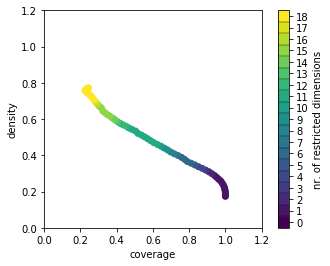

In [28]:
box.show_tradeoff()
box.inspect(73)
plt.show()